<h1>Cyfrowe przetwarzanie sygnałów i obrazów</h1>
<h2>Przetwarzanie i analiza sygnału EKG</h2>
<b>Autorki:</b> Barbara Parzonka 263955, Joanna Zoglowek 264452
<br><br>
<b>Ćwiczenie 4.</b><br>
Celem ćwiczenia jest praktyczne wypróbowanie działania filtrów
w celu wyeliminowania niepożądanych zakłóceń z sygnału EKG. Proszę wybrać
rodzaj filtra do eksperymentowania, np. Butterwortha lub Czebyszewa. Do filtracji
wykorzystać gotowe funkcje z biblioteki scipy.signal [7]. Biblioteka posiada również
funkcje wspomagające projektowanie filtrów, które można zastosować.
<br>1.Wczytaj sygnał ekg noise.txt i zauważ zakłócenia nałożone na sygnał. Wykreślić
częstotliwościową charakterystykę amplitudową sygnału.
<br>2. Zbadaj filtr dolnoprzepustowy o częstotliwości granicznej 60 Hz w celu redukcji
zakłóceń pochodzących z sieci zasilającej. Wyznacz parametry filtra, wykreśl
jego charakterystykę (zależność tłumienia od częstotliwości), przebieg sygnału
po filtracji oraz jego widmo. Można też wyznaczyć różnicę między sygnałem
przed i po filtracji i widmo tej różnicy.
<br>3. Zastosuj następnie, do sygnału otrzymanego w punkcie 2, filtr górnoprzepustowy
o częstotliwości granicznej 5 Hz w celu eliminacji pływania linii izoelektrycznej.
Sporządź wykresy sygnałów jak w punkcie 2.
<br><br>
<b>Opis realizacji zadania</b> <br>
Funkcje wykorzystne w tym zadaniu pochodzą z zadań wcześniejszych (plik methods). Dodatkiem jest filtrowanie sygnału reazlizowane dzięki funkcjom z biblioteki signal (scipy)

<b>Punkt 1.</b>
Wykorzystywana jest funkcja z zadania 1 służąca do wczytania sygnału

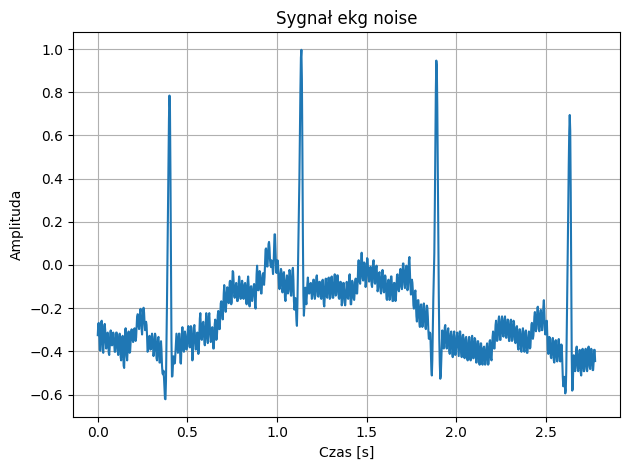

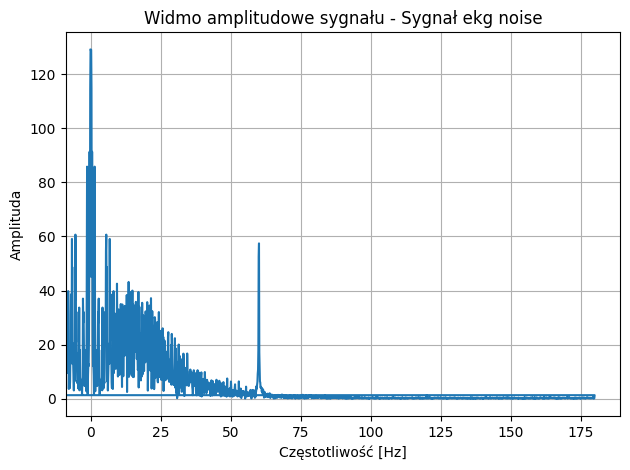

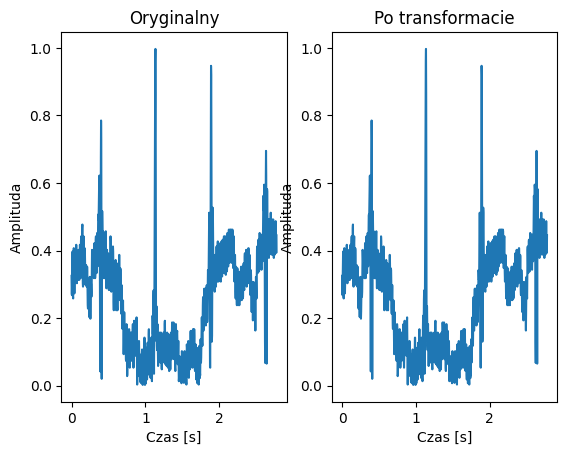

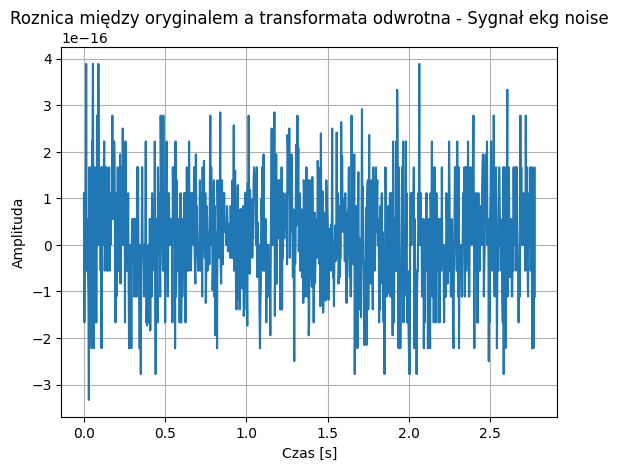

In [6]:
%run methods.ipynb
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

xarray=[]
valuesArray=[]
datapath='../data/'
filepath=datapath+'ekg_noise.txt'
bottomLimit=0
upperLimit=0
hasFirstTime=True
frequency=360

readFile(filename=filepath, frequency=frequency, hasFirstTime=hasFirstTime)
fourierIOdwrotny(valuesArray[0], xarray,frequency, 'Sygnał ekg noise')



Sygnał ekg_noise ma zakłócenia - sygnał jest okresowy, jednak po każdym okresie amplituda sygnału zmienia się w stosunku do poprzedniego okresu<br>
<b>Punkt 2.</b>
Do realizacji wybrano filtry Butterwortha. Częstotliwość odcięcia to 60 Hz, filtr jest dolnoprzepustowy

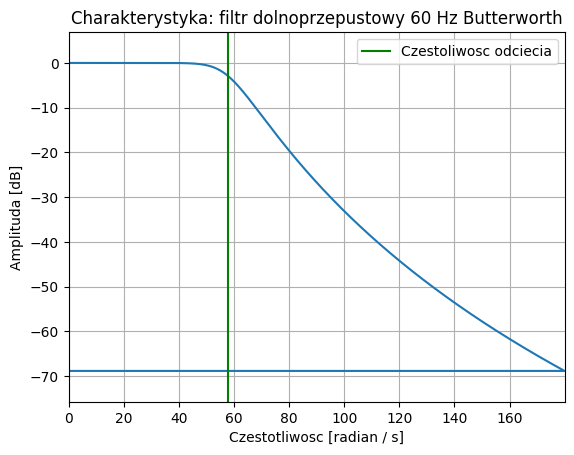

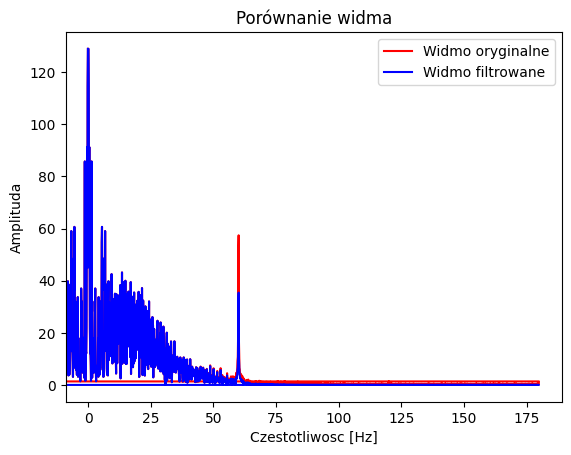

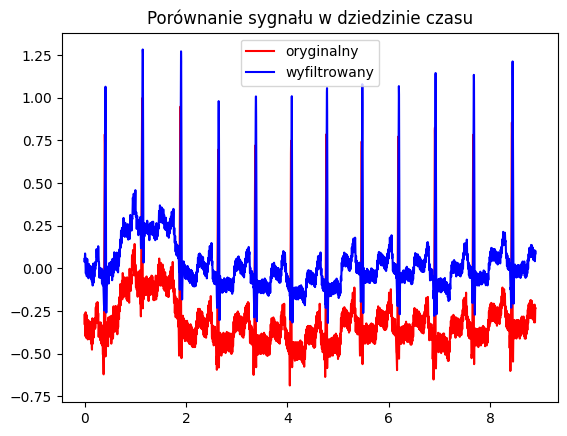

In [7]:
n=len(xarray)
cutoffFrequency=58
bottomPass=5
fs=360
filterOrder=7
freq_axis = np.fft.fftfreq(n, d=1/fs)

b, a = signal.butter(filterOrder, cutoffFrequency, 'lowpass', analog=True)
w, h = signal.freqs(b, a,freq_axis )

filteredSignal=ilustrujFiltrowanie(valuesArray[0], xarray, fs , cutoffFrequency, w, h, "filtr dolnoprzepustowy 60 Hz Butterworth" )

Częstotliwość 60 Hz nie miała dużego wpływu na całkowite widmo sygnału, dlatego po jej wyfiltrowaniu, sygnał zmienia się nieznacznie. <br>
<b>Punkt 3.</b> Filtrowanie otrzymanego sygnału filtrem górnoprzepustowym 5 Hz. (Butterowrth)

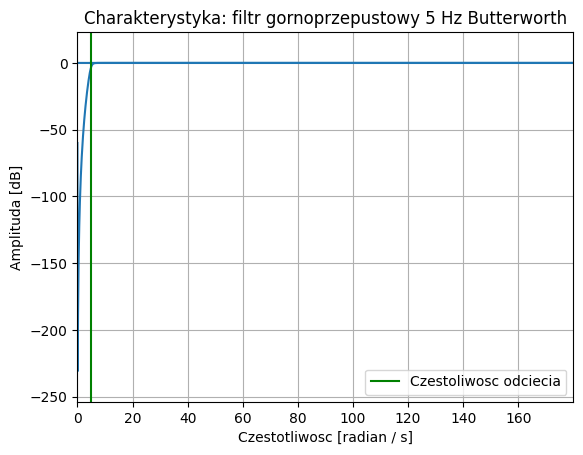

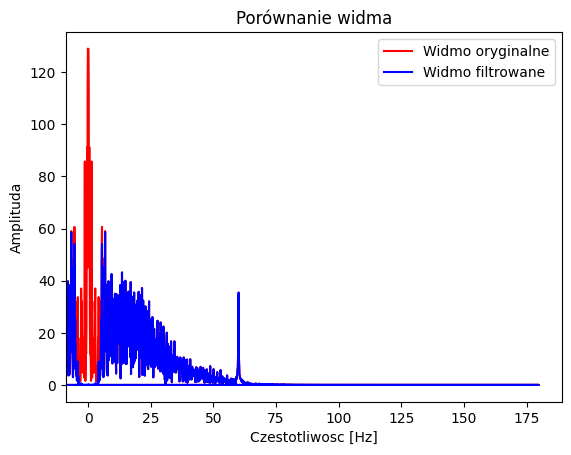

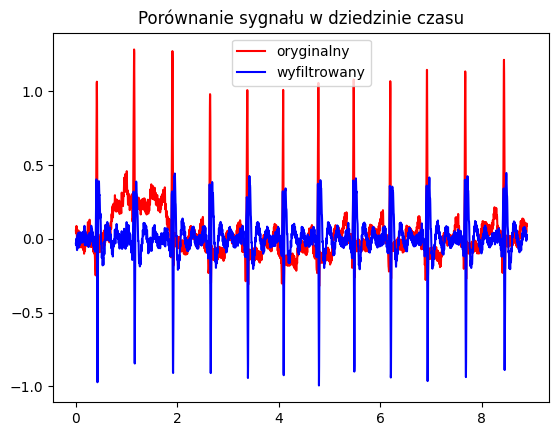

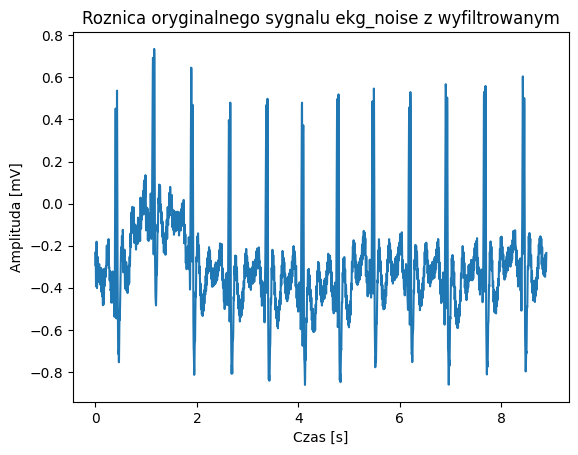

In [8]:
b, a = signal.butter(filterOrder, bottomPass, 'highpass', analog=True)
w, h = signal.freqs(b, a,freq_axis )
cleanSignal=ilustrujFiltrowanie(filteredSignal, xarray, fs , bottomPass, w, h, "filtr gornoprzepustowy 5 Hz Butterworth" )
roznica=valuesArray[0]-cleanSignal
plt.figure()
plt.plot(xarray, roznica)
plt.title('Roznica oryginalnego sygnalu ekg_noise z wyfiltrowanym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda [mV]')
plt.show()

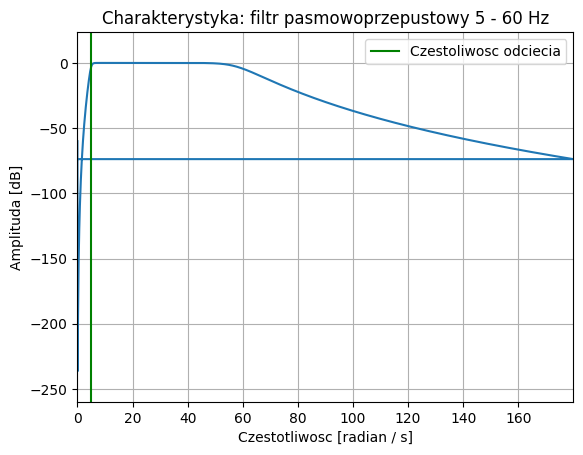

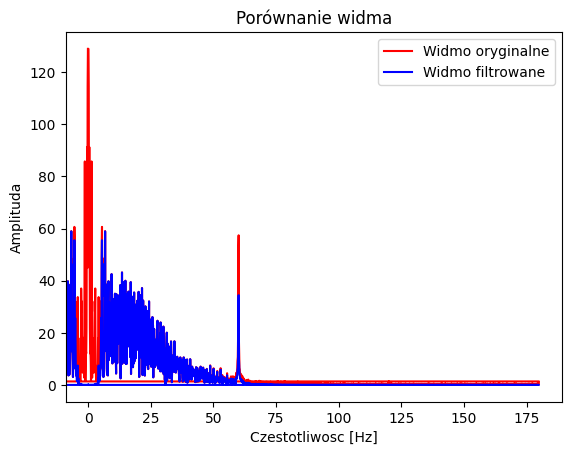

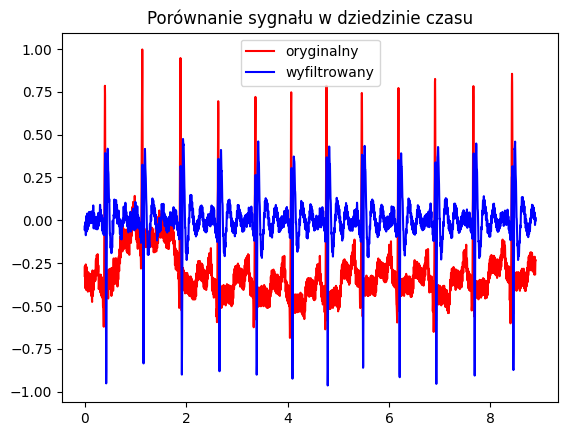

In [9]:
b, a = signal.butter(filterOrder, [bottomPass, cutoffFrequency], 'bandpass', analog=True)
w, h = signal.freqs(b, a,freq_axis )
cleanSignalPass=ilustrujFiltrowanie(valuesArray[0], xarray, fs , bottomPass, w, h, "filtr pasmowoprzepustowy 5 - 60 Hz" )

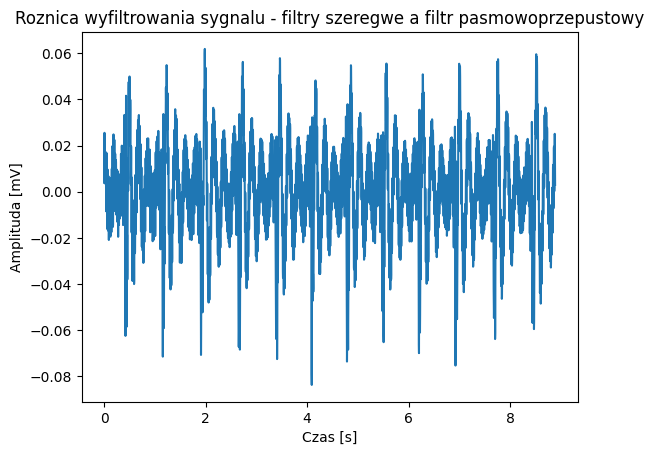

Text(0.5, 1.0, 'wyfiltrowany - filtry szeregowe')

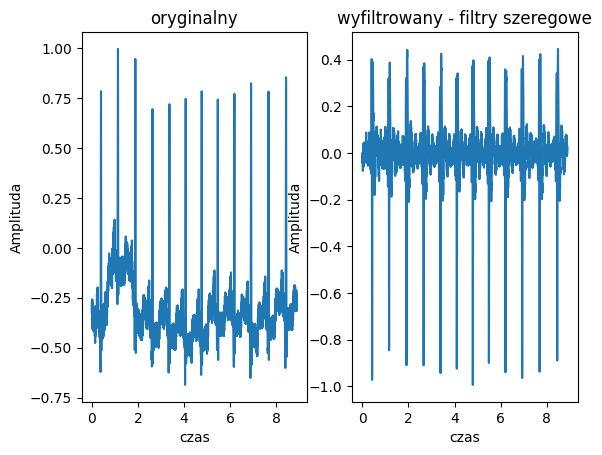

In [10]:
roznicaClean=cleanSignal-cleanSignalPass
plt.figure()
plt.plot(xarray, roznicaClean)
plt.title('Roznica wyfiltrowania sygnalu - filtry szeregwe a filtr pasmowoprzepustowy')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda [mV]')
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.plot(xarray, valuesArray[0])
plt.xlabel('czas')
plt.ylabel('Amplituda')
plt.title('oryginalny')
plt.subplot(1,2,2)
plt.plot(xarray,cleanSignal)
plt.xlabel('czas')
plt.ylabel('Amplituda')
plt.title('wyfiltrowany - filtry szeregowe')

<b>Wnioski</b><br>
Jak można zaobserować różnica oomiędzy filtrem pasmowoprzepustowym a szeregowym połączeniem filtru dolno- i gónoprzepustowego jest nieznaczna